<h1>Importare module necesare

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

<h3>Vizualizare set de date

In [54]:
df = pd.read_csv('vietnam_housing_dataset.csv')
df.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [55]:
df.shape

(30229, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [57]:
df.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


In [58]:
df.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

<h3>Observam ca avem valori lipsa => o sa le inlocuim cu mediana pe cele numerice

In [65]:
coloane_numerice = df.select_dtypes(include=[np.number])
for col in coloane_numerice:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_18573/3726223733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_18573/3726223733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [67]:
coloane_obiecte = df.select_dtypes(include=[np.object_]).columns
for col in coloane_obiecte:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_18573/2934284012.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [69]:
df.isnull().sum()

Address              0
Area                 0
Frontage             0
Access Road          0
House direction      0
Balcony direction    0
Floors               0
Bedrooms             0
Bathrooms            0
Legal status         0
Furniture state      0
Price                0
dtype: int64

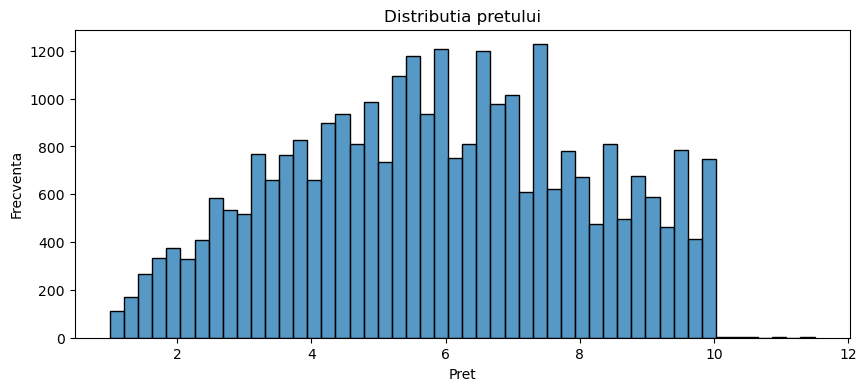

In [70]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Price'].to_numpy())
plt.title('Distributia pretului')
plt.xlabel('Pret')
plt.ylabel('Frecventa')
plt.show()

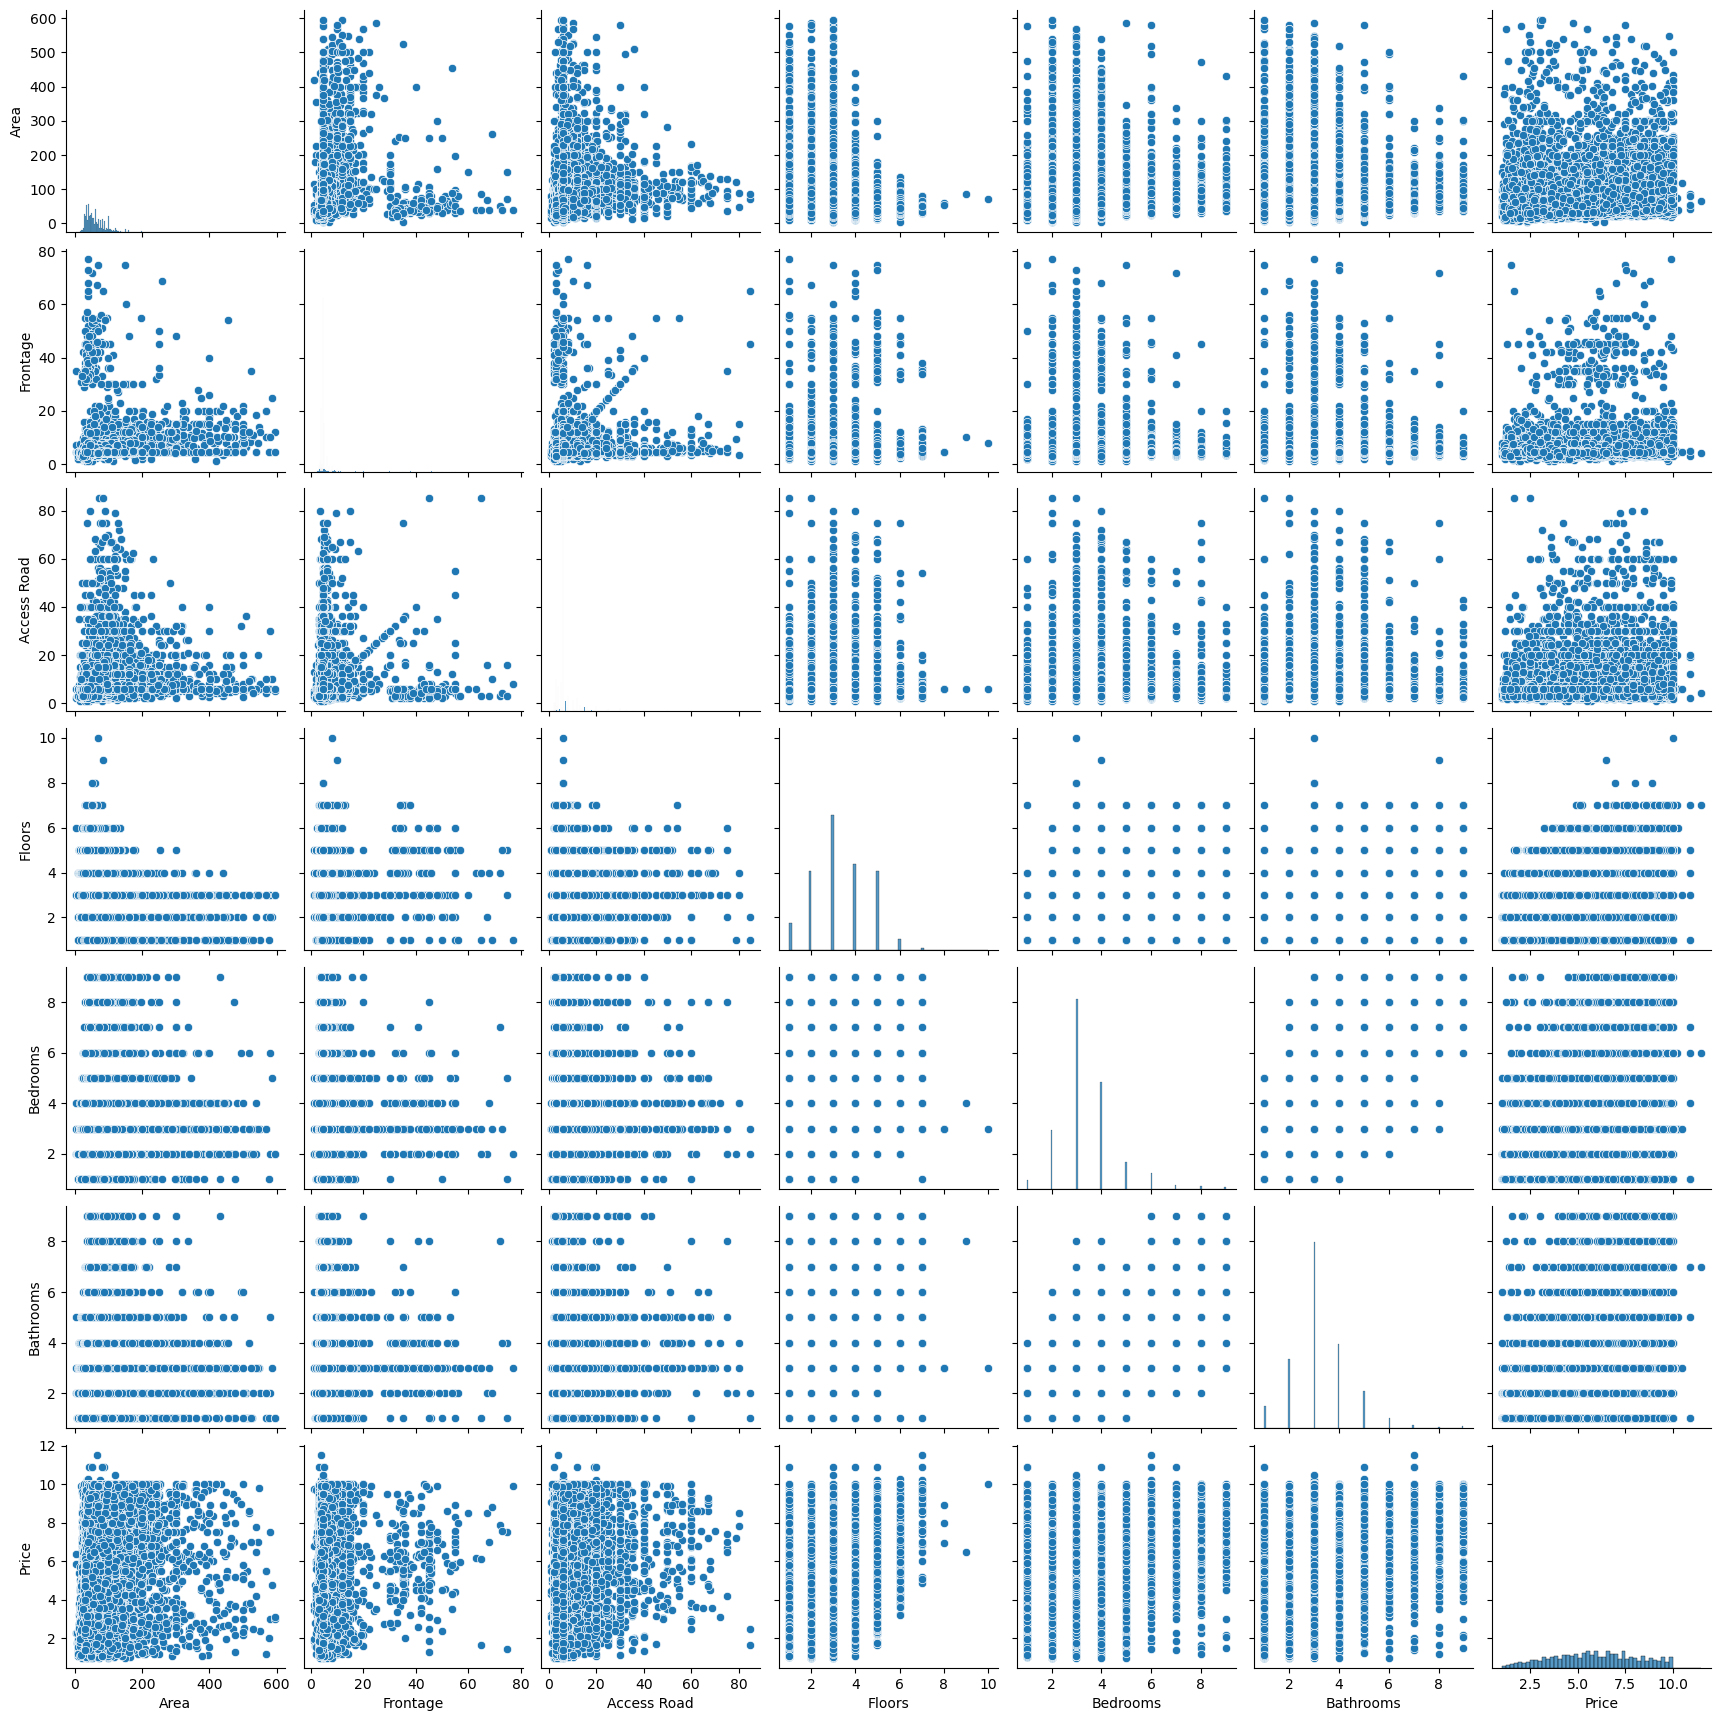

In [88]:
sns.pairplot(df)

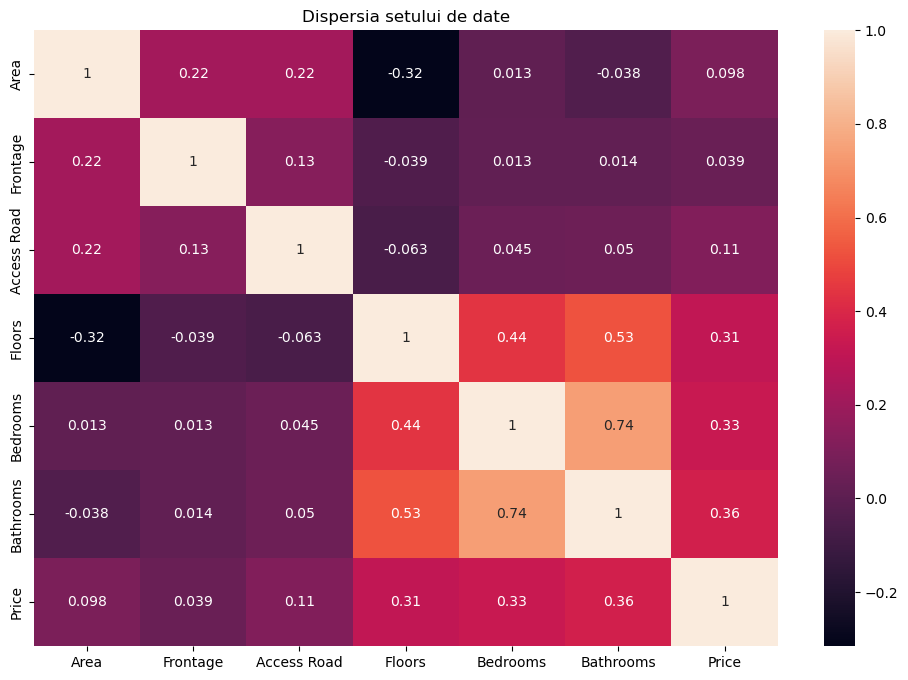

In [75]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Dispersia setului de date')

plt.show()

In [76]:
df.shape

(30229, 12)

In [82]:
X = df.drop(columns = ['Address', 'Price'])
X.head()

,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state
0,84.0,4.5,6.0,Đông - Nam,Đông - Nam,4.0,3.0,3.0,Have certificate,Full
1,60.0,4.5,6.0,Đông - Nam,Đông - Nam,5.0,3.0,3.0,Have certificate,Full
2,90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,Full
3,54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full
4,92.0,4.5,6.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full


In [84]:
X = pd.get_dummies(X, drop_first= True)
X.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,House direction_Nam,House direction_Tây,House direction_Tây - Bắc,House direction_Tây - Nam,...,House direction_Đông - Nam,Balcony direction_Nam,Balcony direction_Tây,Balcony direction_Tây - Bắc,Balcony direction_Tây - Nam,Balcony direction_Đông,Balcony direction_Đông - Bắc,Balcony direction_Đông - Nam,Legal status_Sale contract,Furniture state_Full
0,84.0,4.5,6.0,4.0,3.0,3.0,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
1,60.0,4.5,6.0,5.0,3.0,3.0,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2,90.0,6.0,13.0,5.0,3.0,3.0,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,54.0,4.5,3.5,2.0,2.0,3.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,92.0,4.5,6.0,2.0,4.0,4.0,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [87]:
y = df['Price']
y.head()

0    8.60
1    7.50
2    8.90
3    5.35
4    6.90
Name: Price, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21160, 22)
(21160,)
(9069, 22)
(9069,)


In [92]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [94]:
lm.score(X_test, y_test)

0.20015631300891334

In [97]:
y = np.array(y).reshape(1, -1)
print(y.shape)

(1, 30229)


In [100]:
predictie_y = lm.predict(X_test)

In [102]:
r2 = r2_score(y_test, predictie_y)
mae = mean_absolute_error(y_test, predictie_y)
mse = mean_squared_error(y_test, predictie_y)

print(f'R2 score is {r2}')
print(f'Mean absolute error is {mae}')
print(f'Mean Squared error is {mse}')

R2 score is 0.20015631300891334
Mean absolute error is 1.6136179569115423
Mean Squared error is 3.898244769648498
